In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Market+Risk+Dataset.csv")
df.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [4]:
df.columns=df.columns.str.replace(' ', '_')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [6]:
df.shape

(314, 11)

In [7]:
df.Date.value_counts().sort_values()

31-03-2014    1
05-05-2014    1
12-05-2014    1
19-05-2014    1
26-05-2014    1
             ..
16-03-2020    1
23-03-2020    1
03-02-2020    1
10-02-2020    1
30-03-2020    1
Name: Date, Length: 314, dtype: int64

PART B: Draw Stock Price Graph (Stock Price vs Time) for any 2 given stocks with inference

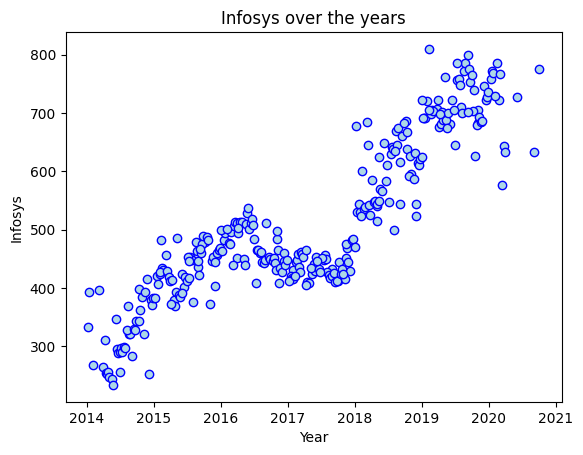

In [8]:
df['dates'] = [pd.to_datetime(d) for d in df['Date']]
plt.scatter(df['dates'],df['Infosys'],edgecolors='b',color='lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

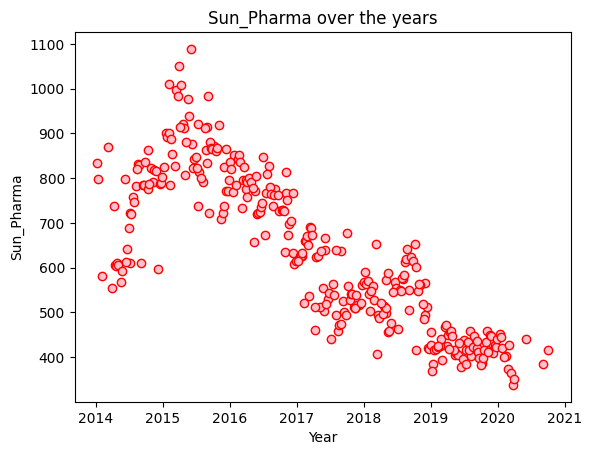

In [9]:
df['dates'] = [pd.to_datetime(d) for d in df['Date']]
plt.scatter(df['dates'],df['Sun_Pharma'],edgecolors='r',color='pink')
plt.xlabel('Year')
plt.ylabel('Sun_Pharma')
plt.title('Sun_Pharma over the years')
plt.show()

PART B: Calculate Returns for all stocks with inference

In [10]:
stock_returns=np.log(df.drop(['Date','dates'],axis=1)).diff(axis=0,periods=1) 

In [11]:
stock_returns.shape

(314, 10)

In [12]:
stock_returns

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
...,...,...,...,...,...,...,...,...,...,...
309,0.009649,-0.110348,0.030305,-0.057580,-0.087011,0.023688,0.072383,-0.053346,-0.287682,-0.127833
310,-0.139625,-0.051293,-0.093819,-0.145324,-0.095310,-0.081183,-0.043319,-0.187816,0.693147,-0.200671
311,-0.094207,-0.236389,-0.285343,-0.284757,-0.105361,-0.119709,-0.050745,-0.141830,-0.693147,-0.117783
312,0.109856,-0.182322,-0.091269,-0.173019,-0.251314,-0.067732,-0.076851,-0.165324,0.000000,-0.133531


- Stock Means: Average returns that the stock is making on a week to week basis

In [24]:
for i in stock_returns.columns:
    print(f"{i}: {stock_returns[i].sum()}")

Infosys: 0.8745213189978598
Indian_Hotel: 0.08338160893905044
Mahindra_&_Mahindra: -0.471323180789744
Axis_Bank: 0.3653821729046616
SAIL: -1.0840134892469573
Shree_Cement: 1.152290133268524
Sun_Pharma: -0.45533693814833764
Jindal_Steel: -1.2903742392411512
Idea_Vodafone: -3.3202283191284887
Jet_Airways: -2.9885637840753785


PART B: Calculate Stock Means and Standard Deviation for all stocks with inference

In [14]:
# MEAN
stock_means=stock_returns.mean(axis=0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [15]:
# STD DEVIATION
stock_sd=stock_returns.std(axis=0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

PART B: Draw a plot of Stock Means vs Standard Deviation and state your inference

In [16]:
df_mu_std=pd.DataFrame({'Average':stock_means,'Volatility':stock_sd})
df_mu_std

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


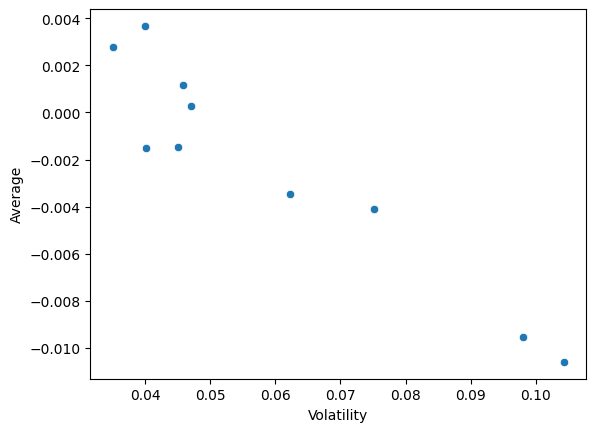

In [17]:
plot=sns.scatterplot(df_mu_std['Volatility'],df_mu_std['Average'])
plt.show()

In [18]:
df_mu_std[(df_mu_std['Volatility']<0.05) & (df_mu_std['Average']>.002)]

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917


PART B: Conclusions and Recommendations

In [27]:
df_mu_std[(df_mu_std['Volatility']>0.09) & (df_mu_std['Average']<-0.008)]

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
